In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (6, 4), 'figure.dpi': 120})

df = pd.read_csv("C:\\Users\\sm\\Documents\\Data science\\Examples\\Time Series Analysis\\Air passanger\\AirPassengers.csv")
df['TravelDate'] = pd.to_datetime(df['TravelDate'], infer_datetime_format=True)
indexeddf = df.set_index(['TravelDate'])


In [ ]:
from datetime import datetime

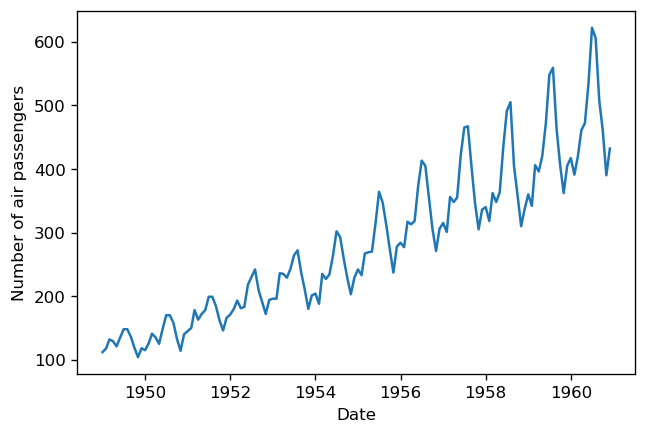

In [17]:
plt.xlabel("Date")
plt.ylabel("Number of air passengers")
plt.plot(indexeddf)

In [21]:
# Determing rolling statistics
rolmean = indexeddf.rolling(window=12).mean()

rolstd  = indexeddf.rolling(window=12).std()
print(rolmean.head(14), rolstd)

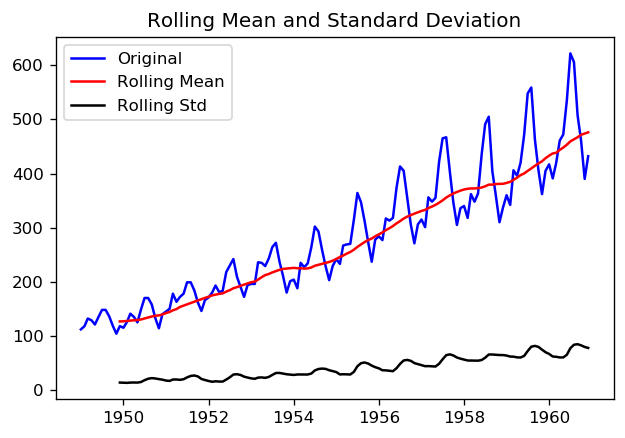

In [23]:
orig = plt.plot(indexeddf, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label ='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

In [31]:
# perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test:')
dftest = adfuller(indexeddf['Passengers'], autolag='AIC')
dfout = pd.Series(dftest[0:4], index=['Test Statistic', 'p-vallue', '#lags used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfout['Crictical value (%s)'%key] = value

print(dfout)


Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-vallue                         0.991880
#lags used                      13.000000
Number of Observations Used    130.000000
Crictical value (1%)            -3.481682
Crictical value (5%)            -2.884042
Crictical value (10%)           -2.578770
dtype: float64


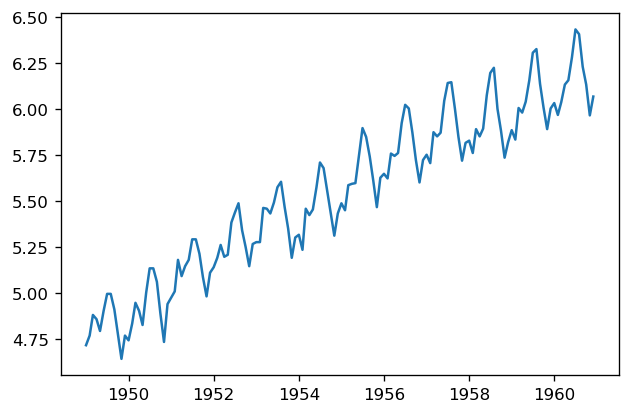

In [33]:
# Estimating trend
indexeddf_log = np.log(indexeddf)
plt.plot(indexeddf_log)

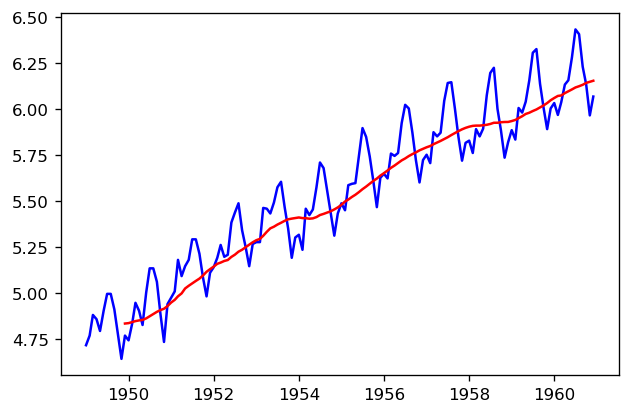

In [34]:
movingAverage = indexeddf_log.rolling(window=12).mean()
movingSTD  = indexeddf_log.rolling(window=12).std()
plt.plot(indexeddf_log, color='blue')
plt.plot(movingAverage, color='red)

In [36]:
dflogminusmovingAverage = indexeddf_log - movingAverage
dflogminusmovingAverage.head(12)

# Remove Nan values
dflogminusmovingAverage.dropna(inplace=True)
dflogminusmovingAverage.head(10)

,Passengers
TravelDate,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [37]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determining rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD  = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label ='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['Passengers'], autolag='AIC')
    dfout = pd.Series(dftest[0:4], index=['Test Statistic', 'p-vallue', '#lags used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfout['Crictical value (%s)'%key] = value
    print(dfout)

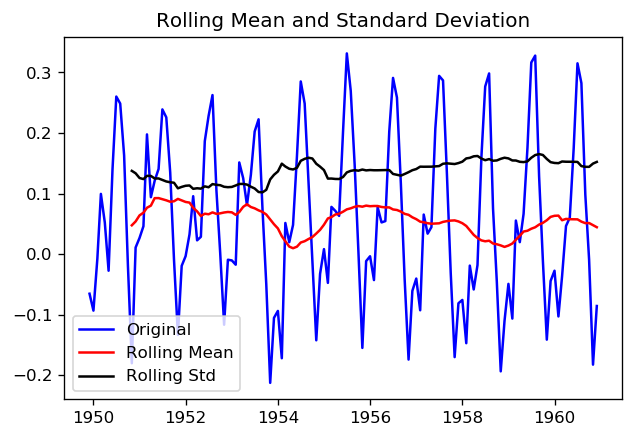

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-vallue                         0.022235
#lags used                      13.000000
Number of Observations Used    119.000000
Crictical value (1%)            -3.486535
Crictical value (5%)            -2.886151
Crictical value (10%)           -2.579896
dtype: float64


In [38]:
test_stationarity(dflogminusmovingAverage)

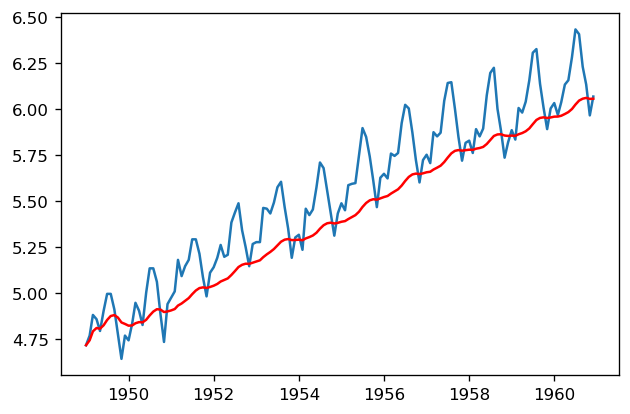

In [40]:
exponentialDecayWeightedAverage = indexeddf_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexeddf_log)
plt.plot(exponentialDecayWeightedAverage, color='red')

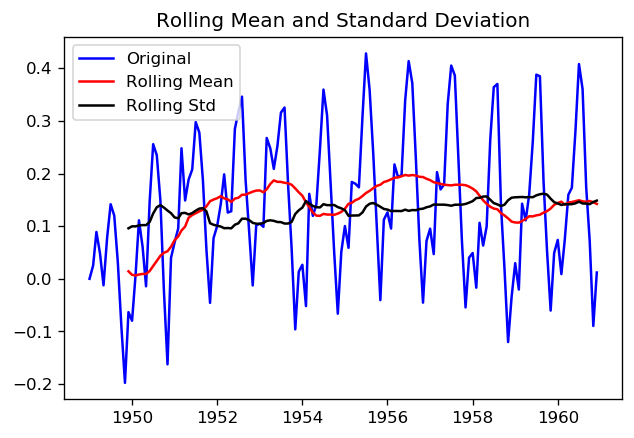

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-vallue                         0.005737
#lags used                      13.000000
Number of Observations Used    130.000000
Crictical value (1%)            -3.481682
Crictical value (5%)            -2.884042
Crictical value (10%)           -2.578770
dtype: float64


In [41]:
dflogminusmmovingExponentialDecayAverage = indexeddf_log - exponentialDecayWeightedAverage
test_stationarity(dflogminusmmovingExponentialDecayAverage)

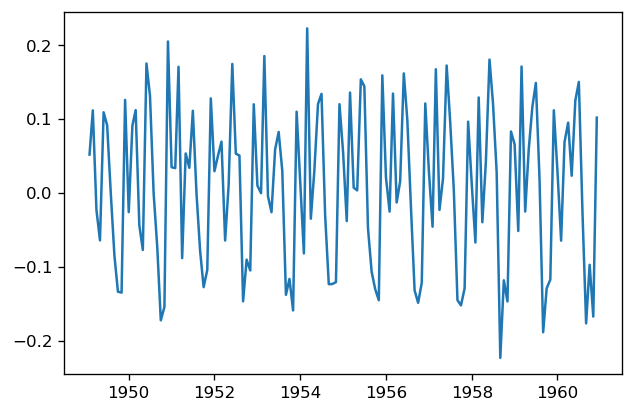

In [52]:
dflogdiffshifting = indexeddf_log - indexeddf_log.shift()
plt.plot(dflogdiffshifting)

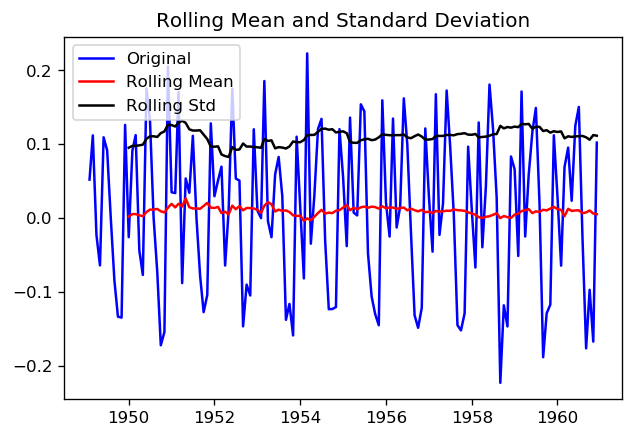

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-vallue                         0.071121
#lags used                      14.000000
Number of Observations Used    128.000000
Crictical value (1%)            -3.482501
Crictical value (5%)            -2.884398
Crictical value (10%)           -2.578960
dtype: float64


In [53]:
dflogdiffshifting.dropna(inplace=True)
test_stationarity(dflogdiffshifting)

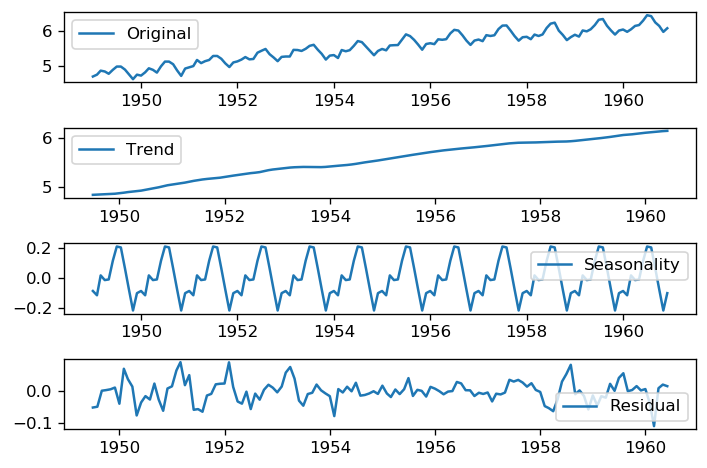

In [85]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexeddf_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexeddf_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()

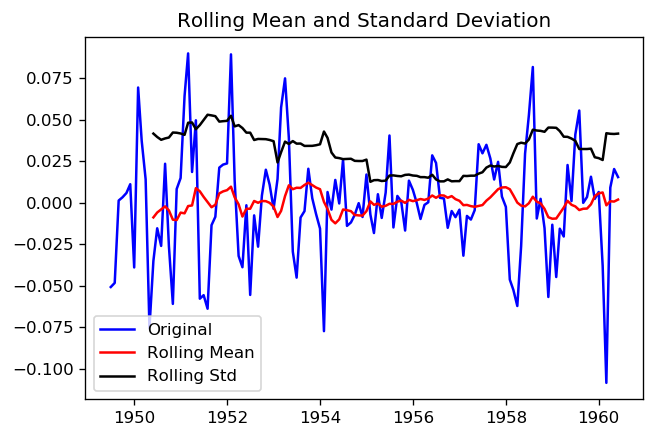

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-vallue                       2.885059e-08
#lags used                     9.000000e+00
Number of Observations Used    1.220000e+02
Crictical value (1%)          -3.485122e+00
Crictical value (5%)          -2.885538e+00
Crictical value (10%)         -2.579569e+00
dtype: float64


In [99]:
decomposedlogData = residual
decomposedlogData.dropna(inplace=True)
df1 = pd.DataFrame({'TravelDate':decomposedlogData.index, 'Passengers':decomposedlogData.values})
df1['TravelDate'] = pd.to_datetime(df1['TravelDate'], infer_datetime_format=True)
df2 = df1.set_index(['TravelDate'])

test_stationarity(df2)

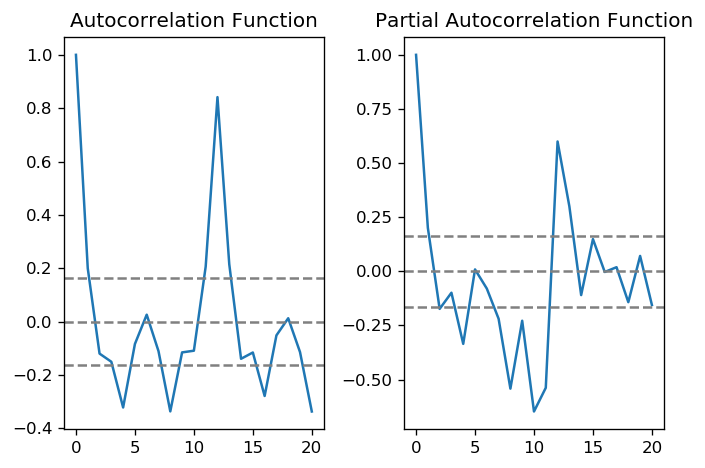

In [106]:
# ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(dflogdiffshifting, nlags=20)
lag_pacf = pacf(dflogdiffshifting, nlags=20, method='ols')

#Plot Acf
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dflogdiffshifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dflogdiffshifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dflogdiffshifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dflogdiffshifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\Users\sm\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\sm\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


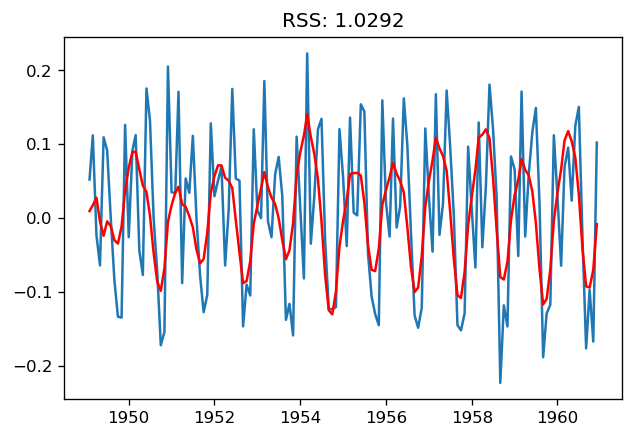

In [109]:
from statsmodels.tsa.arima_model import ARIMA

#AR Model
model = ARIMA(indexeddf_log, order=(2,1,2))
results_AR = model.fit(disp=-1)
plt.plot(dflogdiffshifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - dflogdiffshifting['Passengers'])**2))
print('Plotting AR model')

In [111]:
predictions_Arima_diff = pd.Series(results_AR.fittedvalues, copy=True)
print(predictions_Arima_diff.head())

TravelDate
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [112]:
# Convert to cumulative sum
predictions_Arima_diff_cumsum = predictions_Arima_diff.cumsum()
print(predictions_Arima_diff_cumsum.head())

TravelDate
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [121]:
predictions_ARIMA_log = pd.Series(indexeddf_log['Passengers'], index=indexeddf_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_Arima_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

TravelDate
1949-01-01    4.718499
1949-02-01    4.780265
1949-03-01    4.909873
1949-04-01    4.914554
1949-05-01    4.846011
dtype: float64

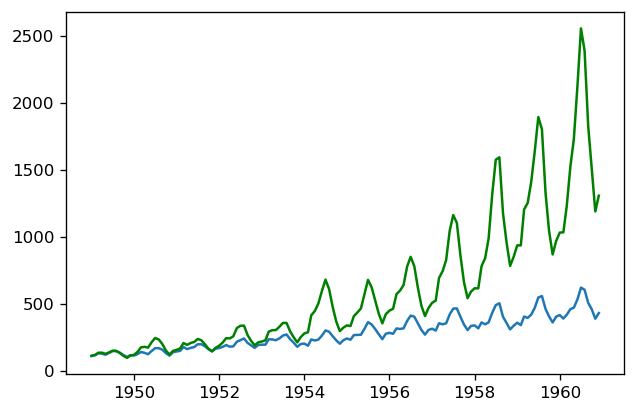

In [123]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexeddf)
plt.plot(predictions_ARIMA, color='green')

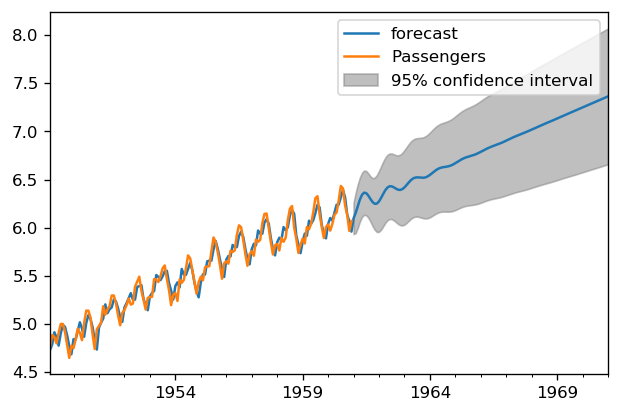

In [128]:
results_AR.plot_predict(1,264)
x=results_AR.forecast(steps=120)


In [144]:
np.exp(x[0])

array([ 443.87098589,  470.03825203,  504.9350064 ,  540.45483361,
        567.73070596,  580.32808992,  577.00262849,  561.93882126,
        542.38459899,  525.56669231,  516.65908351,  518.14324376,
        529.93714607,  549.71676746,  573.36068171,  595.78899849,
        612.33149623,  620.24247219,  619.59547706,  613.03669286,
        604.5966002 ,  598.26636925,  596.94846777,  601.96242594,
        612.98283882,  628.26000413,  645.08001755,  660.46216883,
        671.98844275,  678.50391816,  680.39647774,  679.34137387,
        677.65964603,  677.58622451,  680.69829152,  687.61120742,
        697.93688755,  710.4620689 ,  723.50181902,  735.3638041 ,
        744.81255802,  751.39216759,  755.49848003,  758.18784143,
        760.81237518,  764.6205918 ,  770.4424569 ,  778.52285463,
        788.51639314,  799.62467279,  810.83631229,  821.21005397,
        830.1257689 ,  837.43170889,  843.44776873,  848.83401005,
        854.37747562,  860.76868854,  868.42977172,  877.43084